# <font face = "Dongle" size=7><center> Uber Supply Demand Gap </center></font>

# <font face="courier" size = 6 ><center>Information about the <font color=#34FFB6 > Uber Supply Demand Gap </font > </center></font>

<font face="courier">
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars)<br> and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the<br>
    client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

In [1]:
# data Manipulation libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
import datetime as dt

import warnings # this makes sure that warning signs dont pop up for graphs
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Uber Request data.csv')
df.head() # first few records/rows of the dataframe

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.info() # information about our data frame like the shape (rows, columns), the data type of our features, and the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [4]:
df.describe() # Summary statistics

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


# <font face="courier" size = 6 ><center>Data <font color=#39ff14 >Cleaning </font > </center></font>
<font face="courier">
1. Date-Time format conversion<br>
2. Removing(driver IDs ,request IDs) all the completed rides as they are of no use as we're analysing the cancellation/non availibility

### <font face="courier"> conversion to <font color=#34FFB6 >date-time </font > </font>

In [5]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst = True)
df['Request timestamp']

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [6]:
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst = True)
df['Drop timestamp']

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

### <font face="courier"> <font color=#34FFB6 >cleaning </font >data </font>

In [7]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


#### Percentage missing

In [8]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(df)

Driver id => 39.29%
Drop timestamp => 58.03%


(<AxesSubplot:>,)

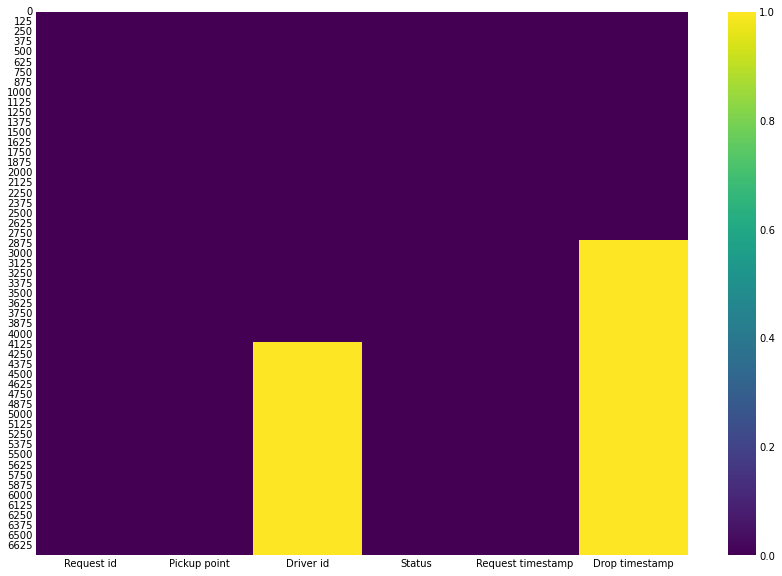

In [9]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.isnull() , cmap='viridis', cbar=True), # to visualize the missing values

In [10]:
# deal with missing values by dropping the feature
df = df.drop(['Request id','Driver id','Drop timestamp'] ,axis = 1)
df.head()

,Pickup point,Status,Request timestamp
0,Airport,Trip Completed,2016-07-11 11:51:00
1,Airport,Trip Completed,2016-07-11 17:57:00
2,City,Trip Completed,2016-07-12 09:17:00
3,Airport,Trip Completed,2016-07-12 21:08:00
4,City,Trip Completed,2016-07-13 08:33:16


## <center><font face="courier"> <font color=#34FFB6 >Feature Engineering

In [11]:
# here we generate 2 new features out of 'Request timestamp' feature
df['rqst_Date'] = df['Request timestamp'].dt.date # this signifies the date
df['rqst_Time'] = df['Request timestamp'].dt.hour # this signifies the time in hours 
df.head()

,Pickup point,Status,Request timestamp,rqst_Date,rqst_Time
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11,11
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11,17
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12,9
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12,21
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13,8


## <center><font face="courier"> <font color=#34FFB6 >Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

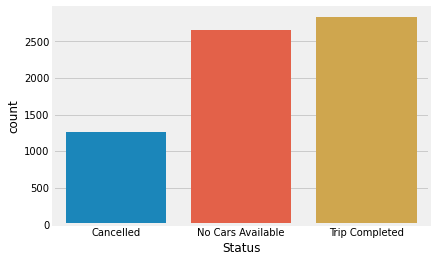

In [12]:
#Univariate analysis on Status column 
sns.countplot(df["Status"],order=['Cancelled','No Cars Available','Trip Completed']),
plt.show

In [13]:
def time_stamps(x) :
#     if(x>=4 and x<=6) :
#         return "Early Morning" 
    if(x>=4 and x<=9) :
        return "Morning" 
    if(x>=10 and x<=16) :
        return "Afternoon" 
    if(x>=15 and x<=19) :
        return "Evening" 
    if((x>=20 and x<=24)or(x==0)) :
        return "Night" 
    
df['rqst_Time'] = df['rqst_Time'].apply(lambda x:time_stamps(x))
df.head()

,Pickup point,Status,Request timestamp,rqst_Date,rqst_Time
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11,Afternoon
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11,Evening
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12,Morning
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12,Night
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13,Morning


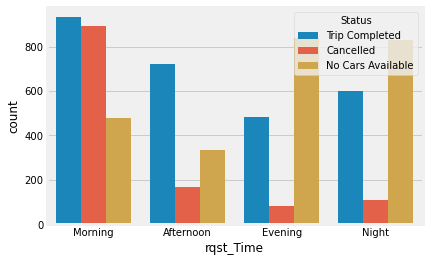

In [14]:
# Visualizing RequestTimeSlot along with the status
sns.countplot(x=df['rqst_Time'],hue=df['Status'],order=["Morning","Afternoon","Evening","Night"])
plt.show()

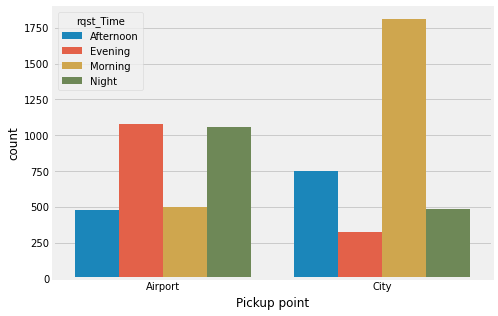

In [15]:
plt.figure(num=None, figsize=(7, 5), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup point', hue="rqst_Time", data=df)
plt.show()

In [16]:
df.loc[(df.Status == 'Trip Completed') | (df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'demand'] = 'Demand'
df.loc[(df.Status == 'Trip Completed'), 'supply'] = 'Supply'
df.loc[(df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'gap'] = 'Gap' 


<Figure size 648x216 with 0 Axes>

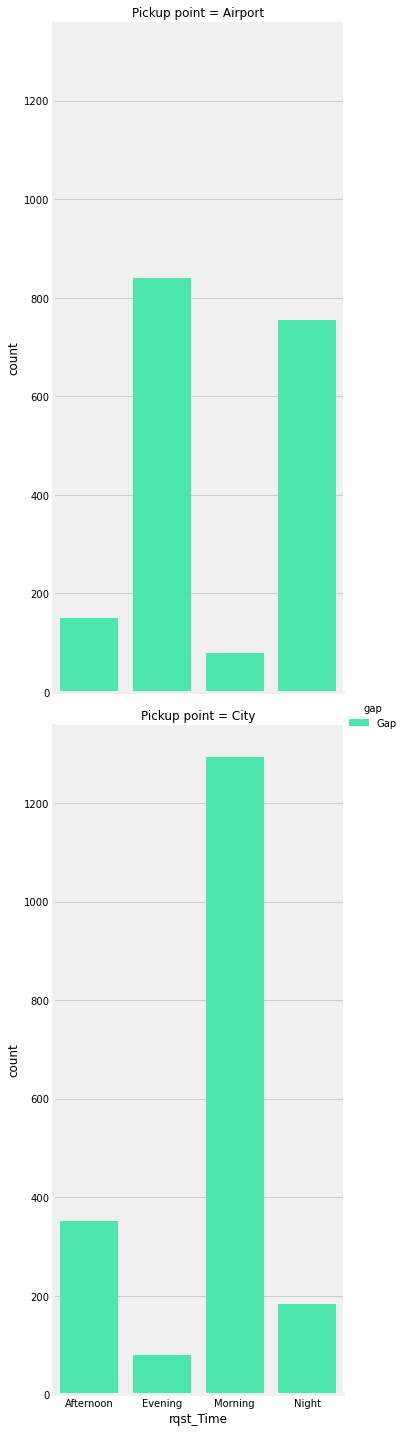

In [17]:
plt.figure(num=None, figsize=(9,3), facecolor='w', edgecolor='k')
sns.catplot(x='rqst_Time',col="Pickup point", hue = 'gap',data=df ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['#34FFB6']))
plt.show()

## <center><font face="courier"> <font color=#34FFB6 >Obserations<br>
<font face="courier">
1.During the evening and night shift the demand from customers shoots up but due to no cars available there is<br>
   &ensp;   loss of revenue.Though there is high demand for cabs from airport to city, the vice versa is not true.<br>
   &ensp;   Hence 'no cars available' in the airport is the hightest in the evening <br>  
   &ensp;   Reason behind No Cars Available could be due to not enough cars are available as cars might not be in <br>
   &ensp;   the airport area due they are in the city and some of the drivers might have gone to home<br>
    
2.During the early morning and morning shift the demand from customers again shoots up but due to cancellation    <br>    &ensp;  there is loss of revneue, there is high demand for cabs from airport to city, the vice versa is not <br>
   &ensp;  true. Hence the driver tends to 'cancel' the request as getting a return trip from airport to city <br>
   &ensp;  would be difficult.
    
To solve these issues a new shift in the evening and night can be done and incentivising the cab drivers that <br>
take up the morning requests should be done